<a href="https://colab.research.google.com/github/omsharma-001/Computer_Vision_Models/blob/main/CNN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-23 04:44:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-23 04:44:47 (106 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2023-05-23 04:44:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.4MB/s    in 8.0s    

2023-05-23 04:45:02 (20.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir, image_size = IMAGE_SIZE, label_mode = "categorical", batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir, image_size = IMAGE_SIZE, label_mode = "categorical", batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3), name = "Input Layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pool_layer")(x)
outputs = tf.keras.layers.Dense(10, activation = "softmax")(x)
model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr =0.001), metrics = ["accuracy"])
history = model_0.fit(train_data, epochs = 5, validation_data = test_data, callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name="10_percent_extraction")])

16705208/16705208 [==============================] - 2s 0us/step


Saving TensorBoard log files to: transfer_learning/10_percent_extraction/20230523-044515
Epoch 1/5
24/24 [==============================] - 24s 447ms/step - loss: 1.8682 - accuracy: 0.4093 - val_loss: 1.3120 - val_accuracy: 0.7216
Epoch 2/5
24/24 [==============================] - 7s 285ms/step - loss: 1.0957 - accuracy: 0.7787 - val_loss: 0.8686 - val_accuracy: 0.8156
Epoch 3/5
24/24 [==============================] - 7s 285ms/step - loss: 0.7907 - accuracy: 0.8213 - val_loss: 0.6956 - val_accuracy: 0.8412
Epoch 4/5
24/24 [==============================] - 8s 328ms/step - loss: 0.6446 - accuracy: 0.8520 - val_loss: 0.6071 - val_accuracy: 0.8492
Epoch 5/5
24/24 [==============================] - 12s 508ms/step - loss: 0.5505 - accuracy: 0.8707 - val_loss: 0.5547 - val_accuracy: 0.8584


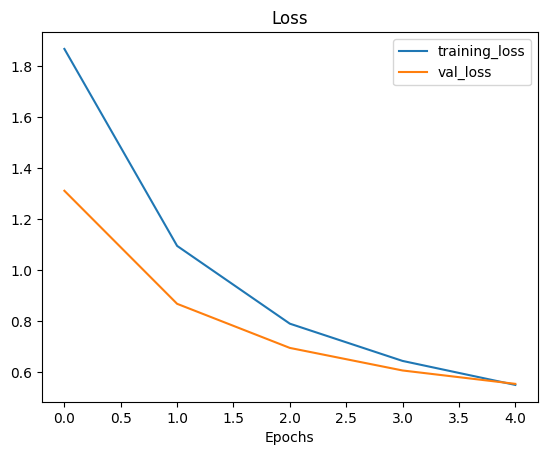

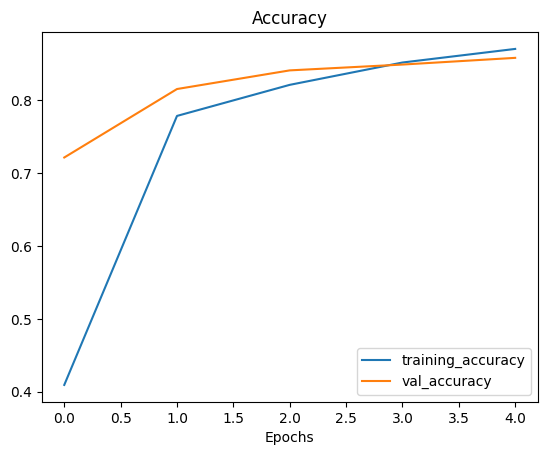

In [ ]:
plot_loss_curves(history)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-05-23 04:46:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.0MB/s    in 7.2s    

2023-05-23 04:46:27 (17.7 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"


In [ ]:
import tensorflow as tf

IMAGE_SIZE = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode = "categorical", image_size = IMAGE_SIZE, batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode = "categorical", image_size =  IMAGE_SIZE, batch_size = 32)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation" )

Text(0.5, 1.0, 'Augmented random image from class: chicken_curry')

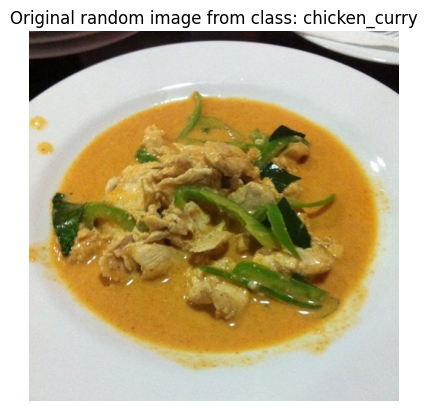

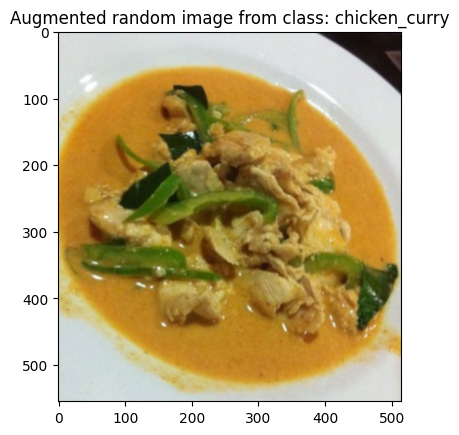

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

augmented_image = data_augmentation(tf.expand_dims(img, axis = 0), training = True)
plt.figure()
plt.imshow(tf.squeeze(augmented_image)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")

In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape)
x = data_augmentation(inputs, training = True)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model_1 = keras.Model(inputs, outputs)
model_1.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])

history = model_1.fit(train_data, epochs =5, validation_data = test_data, callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name ="1_percent_data_augmented")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20230523-044633
Epoch 1/5
3/3 [==============================] - 44s 18s/step - loss: 2.3195 - accuracy: 0.1286 - val_loss: 2.2198 - val_accuracy: 0.1744
Epoch 2/5
3/3 [==============================] - 25s 12s/step - loss: 2.0017 - accuracy: 0.2571 - val_loss: 2.0985 - val_accuracy: 0.2628
Epoch 3/5
3/3 [==============================] - 24s 12s/step - loss: 1.8219 - accuracy: 0.4714 - val_loss: 1.9909 - val_accuracy: 0.3296
Epoch 4/5
3/3 [==============================] - 24s 12s/step - loss: 1.6796 - accuracy: 0.5429 - val_loss: 1.9009 - val_accuracy: 0.4024
Epoch 5/5
3/3 [==============================] - 21s 10s/step - loss: 1.4577 - accuracy: 0.8143 - val_loss: 1.8043 - val_accuracy: 0.4632


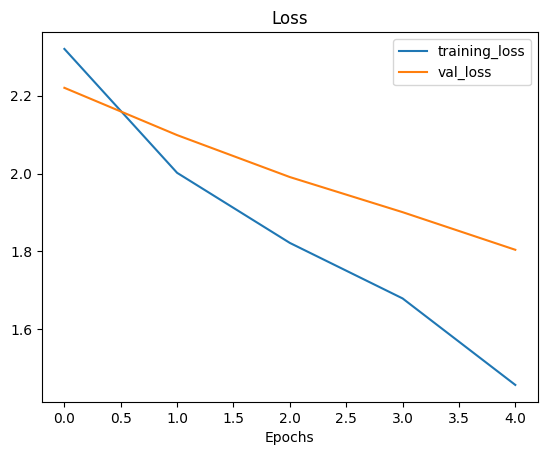

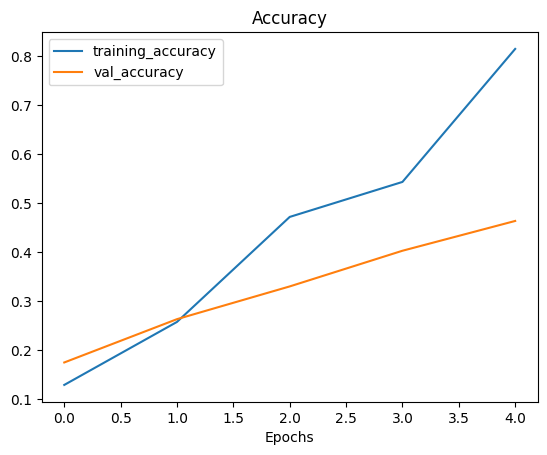

In [ ]:
plot_loss_curves(history)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-05-23 04:49:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  23.1MB/s    in 8.1s    

2023-05-23 04:49:38 (19.8 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [ ]:
import tensorflow as tf
IMAGE_SHAPE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode ="categorical", image_size = IMAGE_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode ="categorical", image_size = IMAGE_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
check_point = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = check_point, save_weights_only = True, save_best_only = False, save_freq = "epoch", verbose = 1)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name = "data_augmentation")

input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = (224,224,3))
x = data_augmentation(inputs, training = True)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation = "softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
history_2 = model_2.fit(train_data, epochs =5, validation_data = test_data, callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name ="10_percent_data_augmented"), checkpoint_callback])


Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented/20230523-044943
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0159 - accuracy: 0.3453
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 36s 1s/step - loss: 2.0159 - accuracy: 0.3453 - val_loss: 1.5688 - val_accuracy: 0.6096
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3396 - accuracy: 0.6800
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 23s 978ms/step - loss: 1.3396 - accuracy: 0.6800 - val_loss: 1.1301 - val_accuracy: 0.7536
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0122 - accuracy: 0.7787
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 26s 1s/step - loss: 1.0122 - accuracy: 0.7787 - val_loss: 0.9323 - val_accuracy: 0.7848
E

In [ ]:
r1 =model_2.evaluate(test_data)

79/79 [==============================] - 16s 199ms/step - loss: 0.7601 - accuracy: 0.8064


In [ ]:
model_2.load_weights(check_point)

In [ ]:
r2 = model_2.evaluate(test_data)

79/79 [==============================] - 16s 198ms/step - loss: 0.7576 - accuracy: 0.7988


In [ ]:
import numpy as np
np.isclose(np.array(r1), np.array(r2))

array([False, False])

In [ ]:
base_model.trainable = True
for layers in base_model.layers[:-10]:
  layers.trainable = False

In [ ]:
model_2.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.0001), metrics = ["accuracy"])

In [ ]:

history_3 = model_2.fit(train_data, validation_data = test_data, epochs = 10, initial_epoch = history_2.epoch[-1], callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name ="10_percent_data_augmented"), checkpoint_callback ])

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented/20230523-052216
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9787
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 618ms/step - loss: 0.0802 - accuracy: 0.9787 - val_loss: 0.6376 - val_accuracy: 0.8152
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9853
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 17s 690ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.6093 - val_accuracy: 0.8264
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9893
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 16s 669ms/step - loss: 0.0415 - accuracy: 0.9893 - val_loss: 0.7313 - val_accuracy:

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2023-05-23 04:55:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.3MB/s    in 22s     

2023-05-23 04:55:43 (22.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")

In [ ]:
import tensorflow as tf
train_data_all = tf.keras.preprocessing.image_dataset_from_directory("10_food_classes_all_data/train", label_mode = "categorical", image_size = (224,224))

test_data_all = tf.keras.preprocessing.image_dataset_from_directory("10_food_classes_all_data/test", label_mode = "categorical", image_size = (224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for layers_num, layers in enumerate (model_2.layers[2].layers):
  print(layers_num, layers.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
 model_2.load_weights(check_point)

In [ ]:
model_2.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.0001), metrics = ["accuracy"])
history_4 = model_2.fit(train_data, validation_data = test_data, epochs = 10, initial_epoch = history_2.epoch[-1], callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name ="100_percent_data_augmented")])

Saving TensorBoard log files to: transfer_learning/100_percent_data_augmented/20230523-053153
Epoch 5/10
24/24 [==============================] - 25s 664ms/step - loss: 0.0624 - accuracy: 0.9787 - val_loss: 0.6936 - val_accuracy: 0.8100
Epoch 6/10
24/24 [==============================] - 15s 637ms/step - loss: 0.0745 - accuracy: 0.9733 - val_loss: 0.7128 - val_accuracy: 0.8164
Epoch 7/10
24/24 [==============================] - 15s 611ms/step - loss: 0.0496 - accuracy: 0.9827 - val_loss: 0.7130 - val_accuracy: 0.8116
Epoch 8/10
24/24 [==============================] - 15s 598ms/step - loss: 0.0517 - accuracy: 0.9853 - val_loss: 0.6854 - val_accuracy: 0.8348
Epoch 9/10
24/24 [==============================] - 14s 579ms/step - loss: 0.0366 - accuracy: 0.9920 - val_loss: 0.7183 - val_accuracy: 0.8280
Epoch 10/10
24/24 [==============================] - 13s 542ms/step - loss: 0.0411 - accuracy: 0.9853 - val_loss: 0.7852 - val_accuracy: 0.8088


In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 Food classes" \
  --description "A series of different transfer learning" \
  --one_shot

2023-05-23 05:38:48.074976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   NDPK-HWKL



New experiment created. View your TensorBoard at: https://tensorboard.dev/ex

In [ ]:
!tensorboard dev list

2023-05-23 05:45:53.619788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/1cb27RZOS0K04zt305VSyQ/
	Name                 Transfer Learning Experiments with 10 Food classes
	Description          A series of different transfer learning
	Id                   1cb27RZOS0K04zt305VSyQ
	Created              2023-05-23 05:39:26 (6 minutes ago)
	Updated              2023-05-23 05:39:44 (6 minutes ago)
	Runs                 17
	Tags                 5
	Scalars              240
	Tensor bytes         0
	Binary object bytes  8414982
https://tensorboard.dev/experiment/rK6jI8hkTZGO5E0Ygpvjmw/
	Name                 EfficientNetB0 vs. resNet50V2
	Description          Comparing two different TF Hub feature extraction model architectures 10 % of the training data
	Id                   rK6jI8hkTZGO5E0Ygpvjmw
	Created              2023-05-19 17:22:17
	Updated              2023-05-19 17:22:22
	Runs                 10
	Tags    